In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [ ]:
print('HELLOOOOO')

In [89]:
df = pd.read_excel('greycom_sales_noOut.xlsx')

In [4]:
df.head()

,DataEmissao,SKU,Qtd
0,2023-12-20,AWR1-110X74,72
1,2023-12-20,AWR1-110X74,72
2,2023-12-20,AWR1-110X74,72
3,2023-12-20,TC193,70
4,2023-12-20,AWR1-110X74,48


In [90]:

#rename columns to something more understandable
df.rename(columns={'DataEmissao':'date', 'Qtd':'quant'}, inplace=True)

#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)


In [92]:
df['day_of_week'] = df['date'].dt.day_name()

In [93]:
#show result
df.head()

,date,SKU,quant,day_of_week
0,2023-12-20,AWR1-110X74,72,Wednesday
1,2023-12-20,AWR1-110X74,72,Wednesday
2,2023-12-20,AWR1-110X74,72,Wednesday
3,2023-12-20,TC193,70,Wednesday
4,2023-12-20,AWR1-110X74,48,Wednesday


In [94]:
#set date as index
#df.set_index('date', inplace=True)

### Visualizing the time series

In [95]:
plt.figure(figsize=(10,4))
plt.plot(df_grey.quant)
plt.title('Sales Over Time', fontsize=20)
plt.ylabel('Quantity Sold', fontsize=16)
for month in range(2024,2024):
    plt.axvline(pd.to_datetime(str(month)+'-01-01'), color='k', linestyle='--', alpha=0.2)


NameError: name 'df_grey' is not defined

<Figure size 1000x400 with 0 Axes>

### Visualizing average quantity sold per day

In [ ]:
average_quant_per_day = df_grey.groupby('day_of_week')['quant'].mean().reset_index()

# Display the result
print(average_quant_per_day)

  day_of_week     quant
0      Friday  4.266215
1      Monday  4.426265
2    Saturday  3.468034
3      Sunday  3.149514
4    Thursday  4.343105
5     Tuesday  4.546310
6   Wednesday  4.292638


Monday - 4.426265
Tuesday - 4.546310
Wednesday - 4.292638
Thursday - 4.393133
Friday - 4.315834
Saturday - 3.468034
Sunday - 3.149514




In [ ]:
# Define the order for the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'day_of_week' to a categorical type with the specified order
average_quant_per_day['day_of_week'] = pd.Categorical(average_quant_per_day['day_of_week'], categories=day_order, ordered=True)

# Sort the DataFrame by the ordered 'day_of_week'
average_quant_per_day = average_quant_per_day.sort_values('day_of_week')

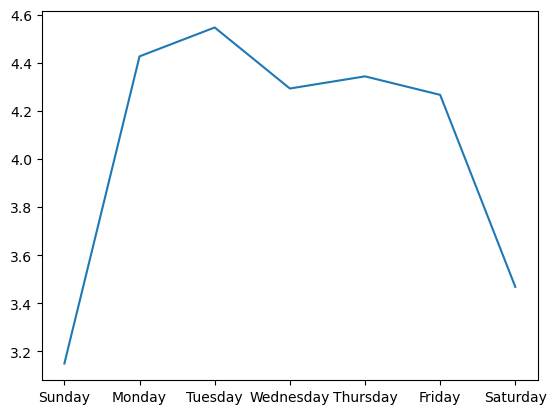

In [ ]:
average_quant_per_day.set_index('day_of_week', inplace=True)
plt.plot(average_quant_per_day)

### Trying to collapse all products

In [ ]:
df

,SKU,quant,day_of_week
date,,,
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,AWR1-110X74,72,Wednesday
2023-12-20,TC193,70,Wednesday
2023-12-20,AWR1-110X74,48,Wednesday
...,...,...,...
2024-08-02,L42PROFULL,1,Friday
2024-08-02,MP4200,1,Friday
2024-08-02,TC270,1,Friday


In [ ]:
df_collapsed = df.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})

/var/folders/k8/hhz0yyvj6qj76b46zqvs9w0r0000gn/T/ipykernel_68487/2793550119.py:1: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  df_collapsed = df_grey.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})


In [ ]:
#Number of unique SKU values

unique_SKUs = df_collapsed['SKU'].nunique()
print(unique_SKUs)

150


In [ ]:
df_collapsed.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

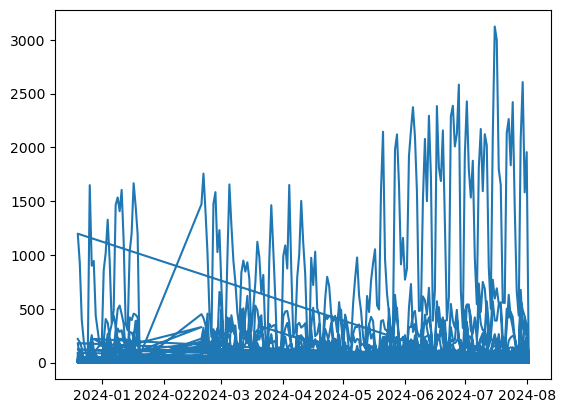

In [ ]:
plt.plot(df_collapsed.quant)

## Analyzing for an arbitrary SKU


- List of SKUs: 'AWR1-110X74', 'TC193', '100X150T27,0M', 'TC225', 'MO300', 'PD589','TC251', 'MO251', 'MO307', 'PD587', 'TC240', 'TC212', 'PD588',
       'TC213', 'MO222', 'AC021', 'HC034', 'FLASH', 'I8', 'MP4200','I9FULL', 'L42PROFULL', 'RE020', 'ALBUMCOPA', 'CE071', 'P9076',
       'TC183', 'PRIX3PLUS', 'TC231', 'ES288', 'ES290', 'AKM610','ZSTXCIANO', 'AMW50', 'SHIELD', 'AKB867', 'PRIX4UNO', 'TC065',
       'TC202', 'CAPAKZ', 'ZSTXROXOMIC', 'LM2596', 'MO212', 'SE226','BE01', 'PRIX3FITNOVA', 'TC297', 'MO380', 'EL250', 'MO381','LED.3MM.LARANJA', '40X40X1TX20M', '40X40X1TX21M', 'MO290',
       'MO382', 'LED.5MM.RGB', 'ES289', 'RE506', 'AMU81','LED.5MM.VERMELHO', 'AC166', 'LED.3MM.RGB', 'PH049',
       'COUCHE100x150', 'L42PRO', 'L42DT', 'RA011', 'TC299', 'SP172','RA038', 'TC284', 'AWE69US', 'BR520', 'RA039', '34x23x3C31M','PH317', 'MO386', 'ZSTXROXO', '2099300kg', 'BR400I', 'P9091',
       'P9134', 'SP050', 'LED.5MM.DIF.VERDE', 'LED.5MM.DIF.VERMELHO','LED.5MM.DIF.AMARELO', 'TC298', 'RA040', 'TSB966', 'PLACAPICKIT',
       'AC285', 'VSI410', 'EL8600', 'TC250', 'TC270', 'MO277', 'P9142','P9145', '9094PLUS', '40x25x2C40M', 'AMB582', 'MC164', 'TC144',
       'AC125', 'QLGCSA3KG', 'QLGCSA10.1KG', 'QLARMG15KG', 'QSADRP10.1KG','QSGCS10.1KG', 'QSGCF10.1KG', 'QGARP10KG', 'QSS7RP10.1KG',
       'QLFRP10.1KG', 'QLARPF15KG', 'QGGCDDM10.1KG', 'QSS7RP3KG','QGGAMDC10.1KG', 'QLGA10.1KG', 'QSFRP10.1KG', 'QSFRP1KG',
       'QGARMG15KG', 'QSGA10.1KG', 'QSDATAR3KG', 'QSARP3KG', 'QLGC10.1KG','SP009', 'QLGA3KG', 'QLARPF10.1KG', 'MO255', 'TC262', 'TC193bu',
       'MO241', 'PH367', 'AWE83US', 'TC154', 'TC234', 'SP166', 'TC269','QAC15KG', 'TC268', 'AC027', 'AC279', 'QGGFCL10.1KG', 'TC294',
       'SP144', 'MO331', 'QGGCMC10.1KG', 'QSLATRS3KG', 'QSFRMG10.1KG','MO384'

In [97]:
df_s = df[df['SKU'] == 'TC251']
sku = df_s.iloc[0, 0]
df_s

,date,SKU,quant,day_of_week
68,2023-12-20,TC251,8,Wednesday
80,2023-12-20,TC251,5,Wednesday
148,2023-12-20,TC251,2,Wednesday
153,2023-12-20,TC251,2,Wednesday
155,2023-12-20,TC251,2,Wednesday
...,...,...,...,...
124831,2024-08-01,TC251,1,Thursday
124844,2024-08-01,TC251,1,Thursday
124852,2024-08-01,TC251,1,Thursday
125146,2024-08-02,TC251,1,Friday


In [98]:
df_c_s = df_s.groupby(['SKU', 'date'], as_index=False).agg({'quant': 'sum'})

In [99]:
df_c_s.set_index('date', inplace=True)
df_c_s.index = pd.to_datetime(df_c_s.index)

In [100]:
df_c_s

,SKU,quant
date,,
2023-12-20,TC251,32
2023-12-21,TC251,11
2023-12-22,TC251,1
2023-12-23,TC251,3
2023-12-24,TC251,5
...,...,...
2024-07-29,TC251,10
2024-07-30,TC251,24
2024-07-31,TC251,20


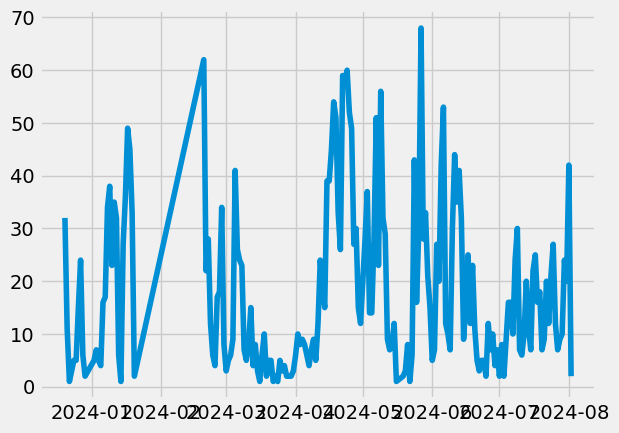

In [101]:
#Whole time period obbservations

plt.plot(df_c_s.quant)

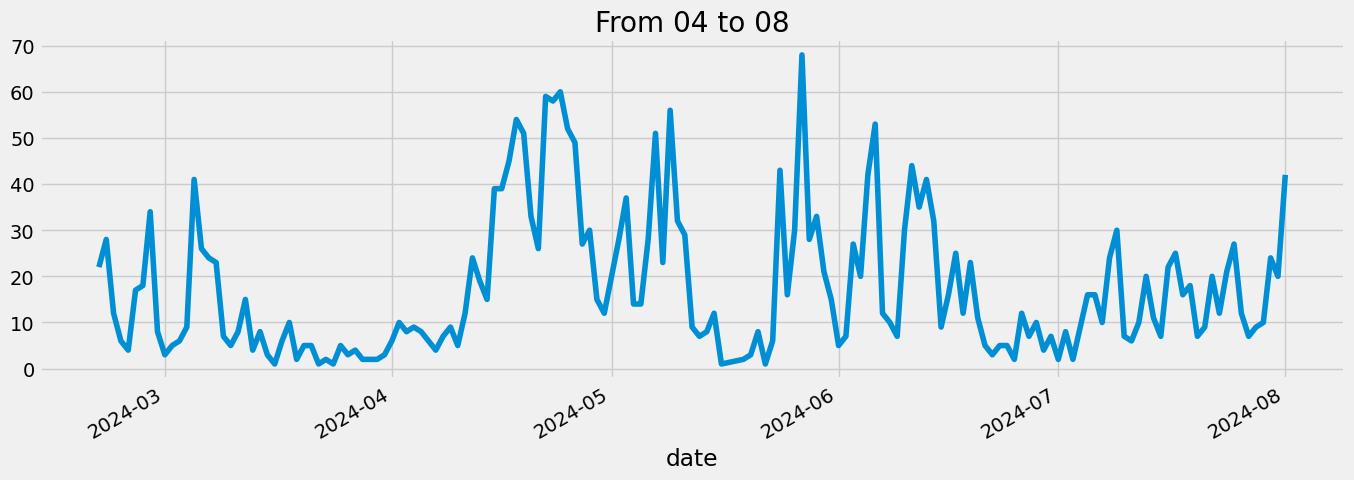

In [102]:
#Arbitrary time period

df_c_s['quant'].loc[(df_c_s.index > '2024-02-20') & (df_c_s.index < '2024-08-02')] \
    .plot(figsize=(15, 5), title='From 04 to 08')
plt.show()

## Feature Creation and splitting the data

In [103]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['lag_1'] = df['quant'].shift(1)
    df['rolling_mean_3'] = df['quant'].rolling(window=3).mean()
    df['dayofweek'] = df.index.dayofweek
    #df['quarter'] = df.index.quarter
    #df['month'] = df.index.month
    #df['year'] = df.index.year
    #df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    #df['weekofyear'] = df.index.isocalendar().week
    return df

df_c_s = create_features(df_c_s)

In [104]:
df_c_s

,SKU,quant,lag_1,rolling_mean_3,dayofweek,dayofmonth
date,,,,,,
2023-12-20,TC251,32,NaN,NaN,2,20
2023-12-21,TC251,11,32.0,NaN,3,21
2023-12-22,TC251,1,11.0,14.666667,4,22
2023-12-23,TC251,3,1.0,5.000000,5,23
2023-12-24,TC251,5,3.0,3.000000,6,24
...,...,...,...,...,...,...
2024-07-29,TC251,10,9.0,8.666667,0,29
2024-07-30,TC251,24,10.0,14.333333,1,30
2024-07-31,TC251,20,24.0,18.000000,2,31


In [105]:
df_c_s = df_c_s.loc[(df_c_s.index > '2024-02-20')].copy()

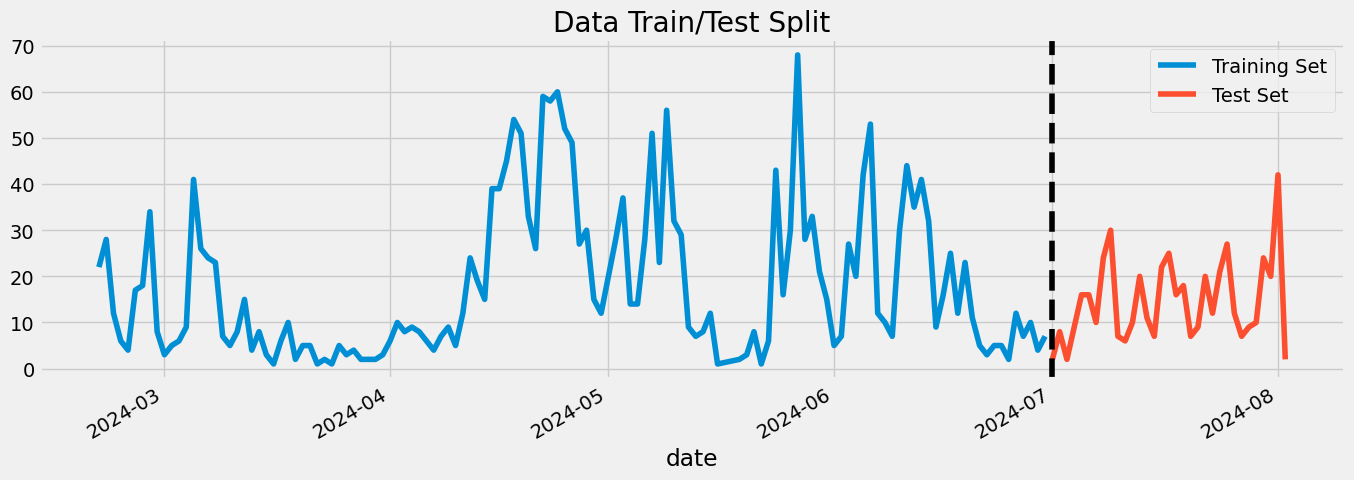

In [106]:
train = df_c_s.loc[df_c_s.index < '2024-07-01']
test = df_c_s.loc[df_c_s.index >= '2024-07-01']

fig, ax = plt.subplots(figsize=(15, 5))
train['quant'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['quant'].plot(ax=ax, label='Test Set')
ax.axvline('2024-07-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Visualizing relationship between features

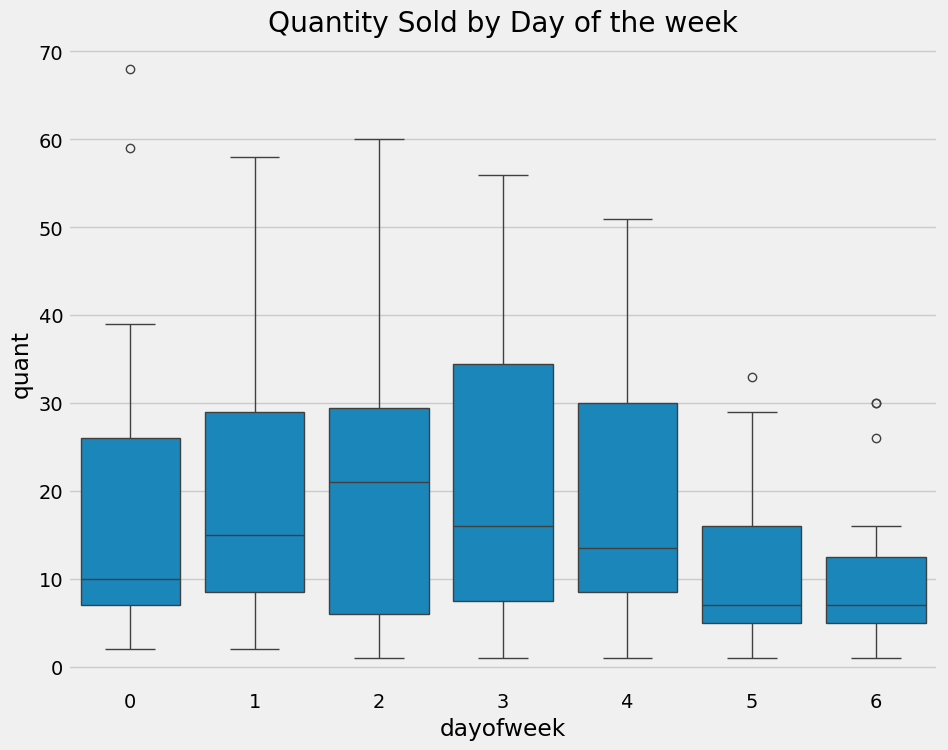

In [107]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_c_s, x='dayofweek', y='quant')
ax.set_title('Quantity Sold by Day of the week')
plt.show()

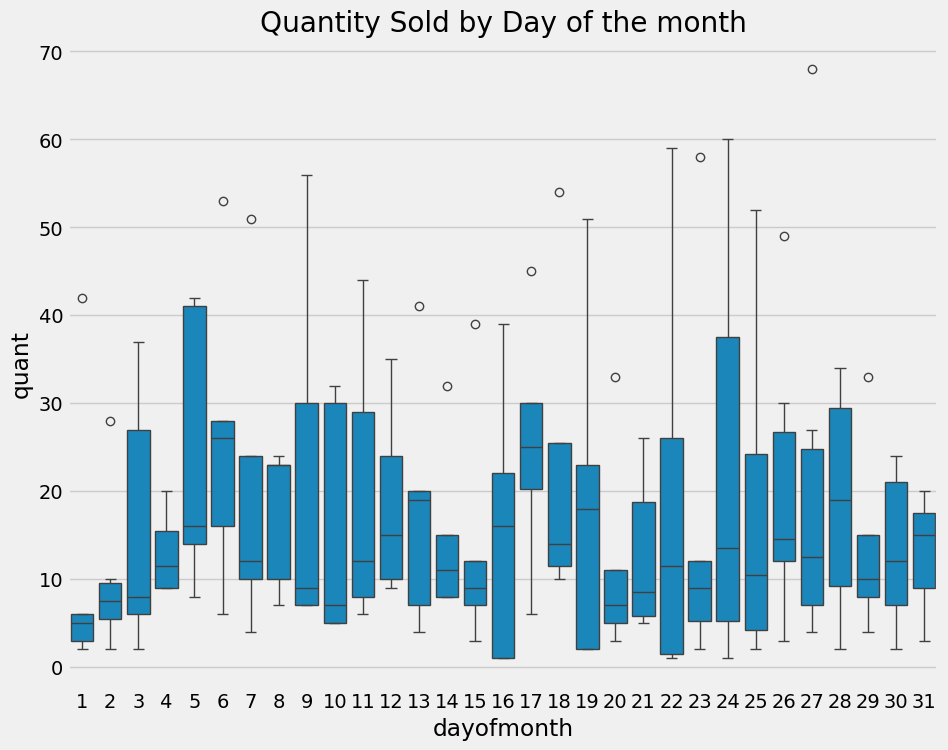

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_c_s, x='dayofmonth', y='quant')
ax.set_title('Quantity Sold by Day of the month')
plt.show()

## Training the model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [109]:
train = create_features(train)
test = create_features(test)

FEATURES = [ 'dayofweek', 'dayofmonth', 'rolling_mean_3', 'lag_1']
TARGET = 'quant'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [110]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:23.96663	validation_1-rmse:16.75074
[100]	validation_0-rmse:10.99894	validation_1-rmse:9.87675
[200]	validation_0-rmse:6.37516	validation_1-rmse:8.70607
[268]	validation_0-rmse:5.09438	validation_1-rmse:8.75005


/Users/emtruzzi/miniconda3/envs/scient/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [21:38:34] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_b6b50u1t0e/croot/xgboost-split_1713972723244/work/cpp_src/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

## Feature Importance

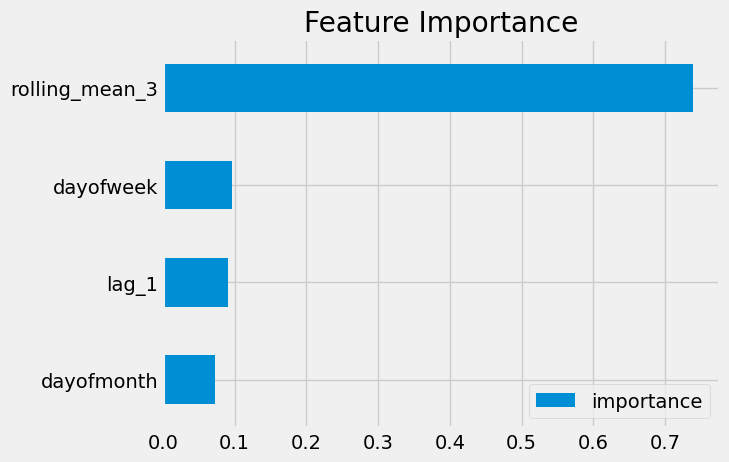

In [111]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

## Test predictions with actual data

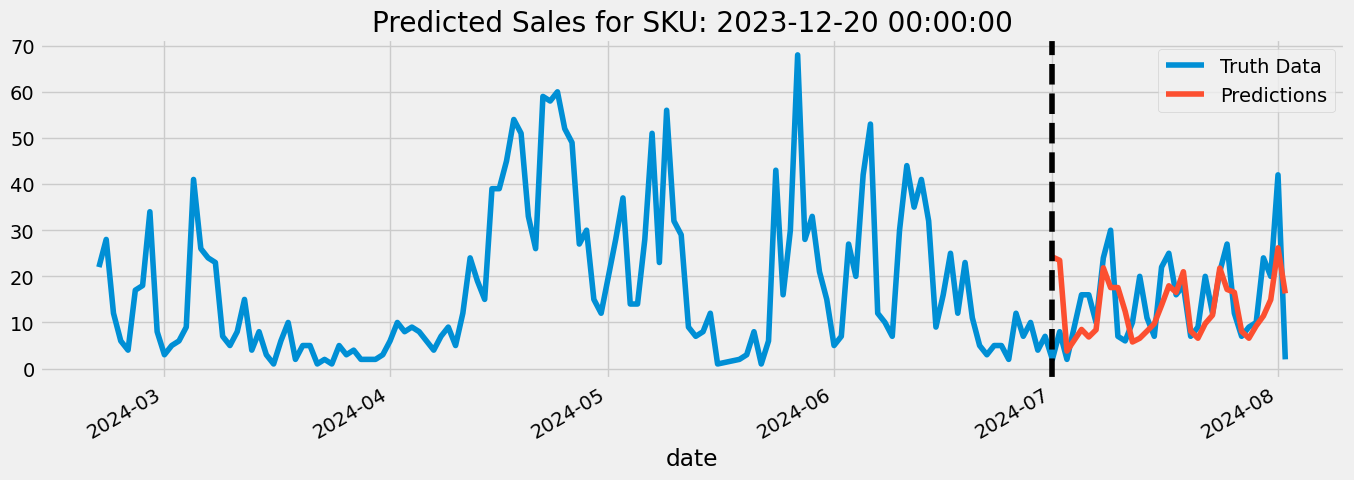

In [112]:
test['prediction'] = reg.predict(X_test)
df = df_c_s.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['quant']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.axvline('2024-07-01', color='black', ls='--')
ax.set_title(f'Predicted Sales for SKU: {sku}')
plt.show()

# Additional advanced methods

## Outlier Removal (manually)

<Axes: ylabel='Frequency'>

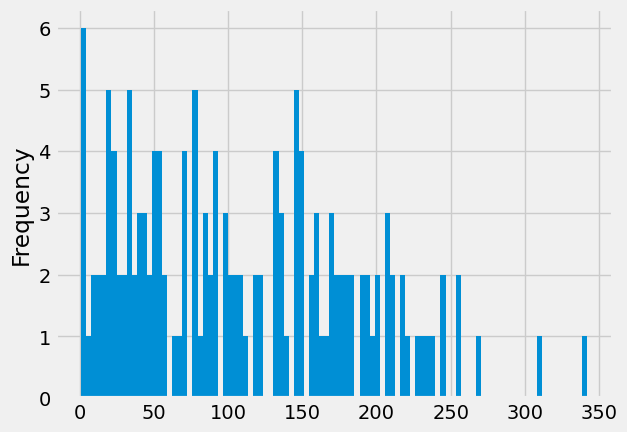

In [ ]:
df_c_tc['quant'].plot(kind='hist', bins = 100)

# values bigger than 250 seem to be the rarest/non-predictable 

<Axes: title={'center': 'Outliers'}, xlabel='date'>

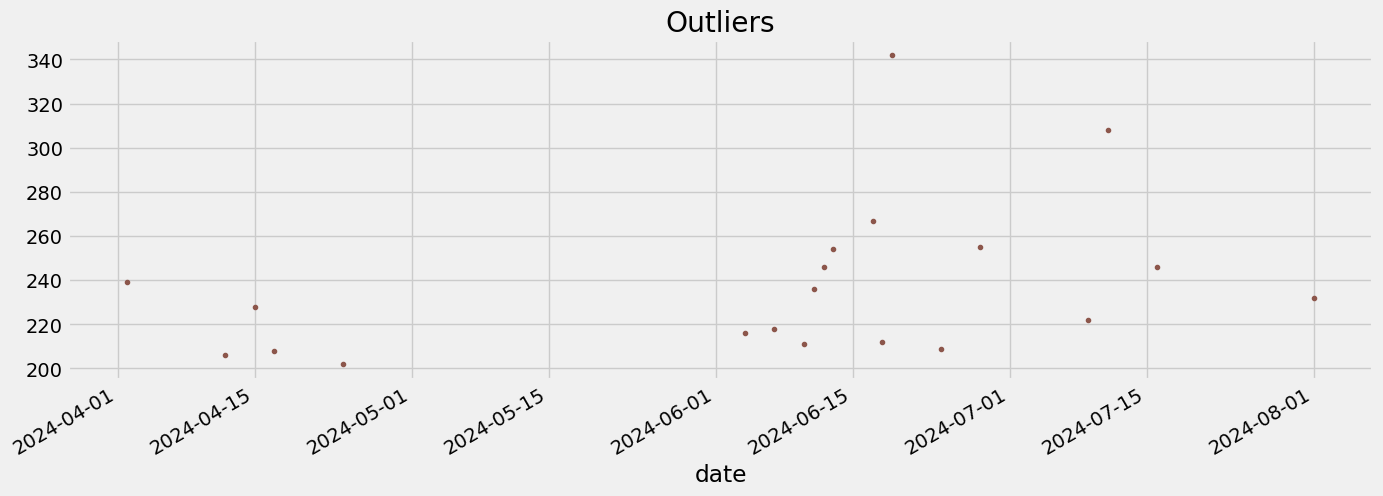

In [ ]:
#Checking for outlier above 250

df_c_tc.query('quant > 200')['quant'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [ ]:
df_c_tc = df_c_tc.query('quant < 250').copy() #removing the outliers